# Aufgabe 2: Chi-Quadrat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.special import binom

(a) Erzeugen Sie mit der Funktion numpy.random.chisquare 100 Zufallszahlen aus einer Chi-
Quadrat-Verteilung mit 5 Freiheitsgraden.

In [2]:
data = np.random.chisquare(5, 100) # 5 degrees of freedom, 100 random numbers

None

In [3]:
#Besprechung

(b) Erstellen Sie mit den zuvor erzeugten Zufallszahlen ein eindimensionales Histogramm mit Feh-
lerbalken (Die Fehler pro Bin sollen √N i mit N i Einträgen pro Bin i sein).

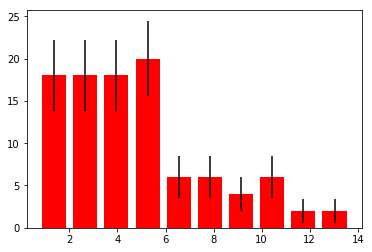

In [4]:
hight, binEdges = np.histogram(data, bins=10,) #berechnet die werte für das Histogramm
#plt.hist() kann keine Fehlerbalken einzeichnen
#man könnte aber auch die Fehlerbalken einfach drüberzeichnen mit plt.errorbar

bincenters = 0.5*(binEdges[1:]+binEdges[:-1]) #packt die balken in die mitte der berechneten bins
err        = np.sqrt(hight)/hight #hier der fehler das /hight ist für später wenns normiert ist
width      = 1 #die breite der balken

plt.bar(bincenters, hight, width=width, color='r', yerr=err*hight)

None

In [5]:
#Besprechung

(c) Stellen Sie das Histogramm und die wahre Dichte scipy.stats.chi2.pdf der Verteilung geeig-
net dar (Tipp: Normalisierung)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


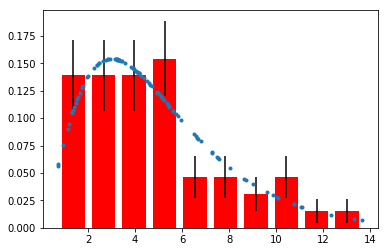

In [6]:
hight_normed, binEdges = np.histogram(data, bins=10, normed = True) #hier werden nochmal die parameter berechnet, aber jetzt ist die höhe normiert

fig1, ax1 = plt.subplots(1,1)

ax1.plot(data, chi2.pdf(data, 5, ), ".") #die funktion in der aufgabe wird genutzt um die wahrschlichkeitsverteilung zu plotten
ax1.bar(bincenters, hight_normed, width=width, color='r', yerr=err*hight_normed,) #wieder plotten mit den normierten höhen und fehlern
None

In [7]:
#Besprechung

(d) Nutzen Sie die Methode scipy.stats.chi2.fit um einen Fit an das in a) gezogene Sample
durchzuführen (Hinweis: Eine solche Fit-Routine wird als Maximum Likelihood Fit bezeichnet)

In [8]:
params = chi2.fit(data, 5, ) #der fit wird ausgführt

None

In [9]:
#Besprechung

(e) Stellen Sie nun das Histogramm zusammen mit sowohl der gefitteten, als auch der wahren Chi-
Quadrat-Verteilung geeignet dar.

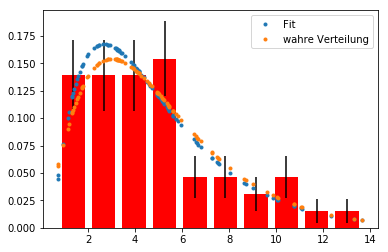

In [10]:
x=np.linspace(0, binEdges[-1])

fig2, ax2 = plt.subplots(1,1)

ax2.plot(data, chi2.pdf(data, *params), ".", label="Fit")
ax2.plot(data, chi2.pdf(data, 5, ), ".", label="wahre Verteilung")
ax2.bar(bincenters, hight_normed, width=width, color='r', yerr=err*hight_normed,)

ax2.legend(loc="best")

None

In [11]:
#Besprechung

# Aufgabe 3 Geburtstage

(a) Schätzen Sie spontan, wieviele Personen benötigt werden, so dass die Wahrscheinlichkeit, dass
zwei von ihnen am selben Tag Geburtstag haben größer als 0,5 ist?

20

(b) Berechnen Sie nun: Wie groß ist die Wahrscheinlichkeit, dass in einer Gruppe von n Personen
zwei oder mehr am selben Tag 1 Geburtstag haben? Für welche n wird die Wahrscheinlichkeit
0,5 oder größer? Vernachlässigen Sie Schaltjahre.

In [12]:
def wahrschl(n):
    return 1-(np.math.factorial(n)*binom(365,n)/(365**n))

n=1
    
while wahrschl(n) < 0.5:
    n=n+1

print(n)

23
